In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from math import isnan
%matplotlib inline

In [2]:
def all_values_equal(table, column, check_nan=True, value = None):
    """
    по умолчанию проверяет во всех ли таблицах данная колонка Nan;
    
    
    если check_nan = False, проверяет, в каждой ли таблице одинаковое значение 
    в данной колонке, но необязательно одно для всех таблиц;
    
    
    если  задан value, проверяет во всех ли таблицах в этой колонке именно такое значение;
    
                   
    возвращает название колонки, результат функции и название курса, где первый раз было невыполнено условие


    """
    if check_nan and value is not None:
        raise Exception('Поставьте check_nan=False или уберите значение value')
        
    subjects = ['math','physics','linguo']
    coursers = [['293','294','295'], ['345','346'],['267','268']]
    for s in enumerate(subjects):
        for c in coursers[s[0]]:
            path = f'courses_with_manual_check/{s[1]}/{c}/'
            df =pd.read_csv(path+f'{table}.csv')
            if check_nan:
                if df[column].isna().sum() != df.shape[0]:
                    return column,False, f'{s[1]}-{c}'         
            else:
                try:
                    if len(df[column].value_counts().values) != 1:
                        if value is not None:
                            if df[column].value_counts().values[0]!=value:
                                return column, False, f'{s[1]}-{c}'
                except: 
                    raise Exception(f'Нет такого столбца в {s[1]}-{c}')
        
    return column, True
    


In [3]:
print(all_values_equal('course_element', 'element_type', check_nan=False))
print(all_values_equal('course_element', 'is_advanced', check_nan=False, value=False)) # во всех таблицах False
print(all_values_equal('course_element', 'score', check_nan=False)) #равны между собой внутри каждой таблицы
print(all_values_equal('course_element', 'max_tries'))


print(all_values_equal('user_course_progress', 'advanced_modules_done', check_nan=False, value=0))


print(all_values_equal('user_module_progress', 'progress_failed', check_nan=False, value=0))
print(all_values_equal('user_module_progress', 'time_closed'))
print(all_values_equal('user_module_progress', 'time_done'))


print(all_values_equal('user_element_progress', 'time_started'))
print(all_values_equal('user_element_progress', 'course_element_type', check_nan=False, value='task'))
print(all_values_equal('user_element_progress', 'hints_used', check_nan=False, value=0))



('element_type', True)
('is_advanced', True)
('score', True)
('max_tries', True)
('advanced_modules_done', False, 'math-295')
('progress_failed', True)
('time_closed', False, 'physics-345')
('time_done', False, 'physics-345')
('time_started', True)
('course_element_type', True)
('hints_used', False, 'linguo-267')


Всюду __NaN__:
\
__course_element__: `max_tries`  
__user_element_progress__:`time_started`

Неинформативные поля(возможно):
\
__course_element__: `open_date`(хотя по нему не уверен, может и полезно), `close_date`, `element_type`, `score`(равны между собой внутри каждой таблицы), `is_advanced`\
**user_course_progress** : `time_created`,`time_updated`\
**user_module_progress** : `progress_failed`, `time_achieve`(кажется можно выкинуть, так как есть поле `is_achieved`), `tasks_done` дублирует `steps_done`, т.к. в нашем случае все `steps` &mdash; это `tasks`\
__user_element_progress__ :`course_element_type`, `time_achieve`(кажется можно выкинуть, так как есть поле `is_achieved`)

In [4]:
path = 'courses_with_manual_check/math/293/'
course_element = pd.read_csv(path+'course_element.csv')
course_element = course_element.drop(columns=['max_tries']).dropna()
course_element = course_element.drop(columns = ['close_date','element_type','score','is_advanced'])
course_element.head().append(course_element.tail())

,id,module_id,element_id,position,open_date
0,4333709,3454,2493,18,2021-03-23 21:00:00
1,4151007,3454,2526,11,2021-03-09 21:00:00
2,4022486,3454,2633,8,2021-03-01 08:00:00
3,5078158,3454,2637,44,2021-05-31 08:00:00
4,4722327,3454,2699,31,2021-04-28 08:00:00
39,4333729,3454,11393,20,2021-03-27 10:00:00
40,4722352,3454,11456,30,2021-04-24 08:00:00
41,4022438,3454,11609,6,2021-02-25 21:00:00
42,4722354,3454,11973,28,2021-04-19 21:00:00
43,4722355,3454,13054,27,2021-04-19 21:00:00


In [5]:
user_course_progress = pd.read_csv(path+'user_course_progress.csv').drop(columns=['time_created','time_updated'])
user_course_progress

,id,user_id,course_id,modules_achieved,advanced_modules_done,modules_closed,modules_done
0,251326,100120070111035903,293,22,0,22,22
1,251178,100119810110737205,293,20,0,19,19
2,251331,100120070111193822,293,21,0,10,10
3,251196,100120070111166725,293,22,0,22,22
4,251218,100120070111579569,293,13,0,13,13
...,...,...,...,...,...,...,...
109,305708,100120080111143974,293,17,0,17,17
110,303078,100120070111045630,293,0,0,0,0
111,303091,100120070110738313,293,2,0,0,2
112,299339,100120070111131771,293,0,0,0,0


`user_module_progress` нас кажется не интересует, как таргет

>Модуль с ручной проверкой отличается от обычного тем, что __все задачи в нём требуют ручной проверки__ преподавателя.
  
  
>`steps_done` —число элементов с __автоматической__ проверкой в модуле, по которым получено максимальное число баллов  

Почему `steps_done` в таблице не ноль? Ладно


In [6]:
user_module_progress = pd.read_csv(path+'user_module_progress.csv').drop(columns=['progress_failed', 'tasks_done'])
user_module_progress['achieve_reason'] = user_module_progress['achieve_reason'].fillna("haven't achieved")
user_module_progress['is_achieved'] = user_module_progress['is_achieved'].fillna(False).astype(int)

user_module_progress['is_closed'] = user_module_progress['is_closed'].astype(int)
user_module_progress['is_done'] = user_module_progress['is_done'].astype(int)



user_module_progress

,id,user_id,course_id,course_module_id,progress_current,steps_done,is_achieved,is_closed,course_progress_id,time_created,time_updated,time_closed,time_achieved,time_unlocked,time_done,is_done,achieve_reason
0,4258599,100120070111171973,293,3454,130.0,10,0,0,295079,2021-03-10 18:45:33.221355,2021-06-13 05:25:06.712449,NaN,NaN,2021-03-10 18:45:33.221355,NaN,0,haven't achieved
1,4091857,100120070111412531,293,3454,104.0,13,0,0,251197,2021-02-15 15:16:33.467243,2021-05-12 10:46:54.123536,NaN,NaN,2021-02-15 15:16:33.467243,NaN,0,haven't achieved
2,4288362,100120070110510698,293,3454,0.0,0,0,0,297852,2021-03-15 07:53:33.152413,NaN,NaN,NaN,2021-03-15 07:53:33.152413,NaN,0,haven't achieved
3,4091867,100120100111069319,293,3454,218.0,30,1,0,251184,2021-02-15 15:16:33.467243,2021-05-27 14:20:00.909789,NaN,2021-05-27 14:20:00.909789,2021-02-15 15:16:33.467243,NaN,0,solved
4,4336135,100120070111077654,293,3454,0.0,0,0,0,302793,2021-03-21 11:51:56.202819,NaN,NaN,NaN,2021-03-21 11:51:56.202819,NaN,0,haven't achieved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4257953,100120070111448503,293,3454,0.0,0,0,0,295007,2021-03-10 17:11:52.784012,NaN,NaN,NaN,2021-03-10 17:11:52.784012,NaN,0,haven't achieved
110,4353698,100120080110746673,293,3454,0.0,0,0,0,304476,2021-03-25 09:41:19.007677,NaN,NaN,NaN,2021-03-25 09:41:19.007677,NaN,0,haven't achieved
111,4091834,100120070110754993,293,3454,228.0,31,1,0,251449,2021-02-15 15:16:33.467243,2021-06-12 09:25:59.109609,NaN,2021-06-12 09:25:16.790533,2021-02-15 15:16:33.467243,NaN,0,solved
112,4256581,100120070111532948,293,3454,259.0,35,1,0,294867,2021-03-10 14:18:56.222065,2021-06-05 11:37:37.909807,NaN,2021-05-25 18:35:27.815664,2021-03-10 14:18:56.222065,NaN,0,solved


In [7]:
user_module_progress.isna().sum()/user_module_progress.shape[0]

id                    0.000000
user_id               0.000000
course_id             0.000000
course_module_id      0.000000
progress_current      0.000000
steps_done            0.000000
is_achieved           0.000000
is_closed             0.000000
course_progress_id    0.000000
time_created          0.000000
time_updated          0.543860
time_closed           1.000000
time_achieved         0.885965
time_unlocked         0.000000
time_done             1.000000
is_done               0.000000
achieve_reason        0.000000
dtype: float64

In [8]:
user_element_progress = pd.read_csv(path+'user_element_progress.csv').drop(columns=['course_element_type','time_started'])
user_element_progress['achieve_reason'] = user_element_progress['achieve_reason'].fillna("haven't achieved")
user_element_progress['is_achieved'] = user_element_progress['is_achieved'].fillna(False).astype(int)
user_element_progress

,id,user_id,course_id,course_module_id,course_element_id,progress_current,is_achieved,hints_used,tries_count,module_progress_id,time_created,time_updated,time_closed,time_achieved,achieve_reason
0,96461094,100120070111566368,293,3454,3892,7.0,1,0,1,4091856,2021-05-21 10:16:20.707856,2021-06-11 07:33:25.957219,2021-06-11 07:33:25.959167,2021-06-11 07:33:25.959167,solved
1,96461097,100120080111377852,293,3454,2637,7.0,1,0,1,4091852,2021-05-21 10:16:20.707856,2021-06-11 07:30:33.504585,2021-06-11 07:30:33.506627,2021-06-11 07:30:33.506627,solved
2,96461175,100120090110736982,293,3454,2637,7.0,1,0,1,4091854,2021-05-21 10:16:21.607894,2021-06-11 07:30:07.341239,2021-06-11 07:30:07.343554,2021-06-11 07:30:07.343554,solved
3,96461178,100120090110736982,293,3454,3892,7.0,1,0,1,4091854,2021-05-21 10:16:21.607894,2021-06-11 07:29:41.535418,2021-06-11 07:29:41.537406,2021-06-11 07:29:41.537406,solved
4,96461112,100120070110754993,293,3454,3892,7.0,1,0,1,4091834,2021-05-21 10:16:21.126957,2021-06-10 07:42:26.286960,2021-06-10 07:42:26.294751,2021-06-10 07:42:26.294751,solved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,79509062,100120080111565481,293,3454,4249,7.0,1,0,1,4091843,2021-02-15 15:16:33.467243,2021-02-20 20:35:11.210408,2021-02-20 20:35:11.207655,2021-02-20 20:35:11.207655,solved
5012,79508935,100120070111416092,293,3454,4251,7.0,1,0,1,4091811,2021-02-15 15:16:33.467243,2021-02-19 17:38:56.012436,2021-02-19 17:38:56.013306,2021-02-19 17:38:56.013306,solved
5013,79509064,100120070111166725,293,3454,4150,7.0,1,0,3,4091844,2021-02-15 15:16:33.467243,2021-02-18 18:33:30.509323,2021-02-18 18:33:30.510777,2021-02-18 18:33:30.510777,solved
5014,79508957,100120080110738241,293,3454,5059,7.0,1,0,1,4091817,2021-02-15 15:16:33.467243,2021-02-17 19:11:21.166433,2021-02-17 19:11:21.170167,2021-02-17 19:11:21.170167,solved


In [9]:
user_element_progress[['progress_current','hints_used','tries_count','is_achieved']].describe()

,progress_current,hints_used,tries_count,is_achieved
count,5016.000000,5016.0,5016.000000,5016.000000
mean,1.239234,0.0,0.354864,0.156898
std,2.593916,0.0,0.837118,0.363741
min,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000
max,7.000000,0.0,7.000000,1.000000


## Рандомные ответы детей 

In [10]:
for i in range(5):
    rpath = f'courses_with_manual_check/math/29{3+np.random.randint(0,2)}/'
    solution_log = pd.read_csv(rpath+'solution_log.csv')
    text = json.loads(solution_log['users_answer'].values[np.random.randint(0,solution_log.shape[0])])['solution']['message']
    while(text==""):
        text = json.loads(solution_log['users_answer'].values[np.random.randint(0,solution_log.shape[0])])['solution']['message']
    print(text)
    print('-'*115)


Если не a=b=c, то либо 2 из переменных равны (a>b=c) либо все не равны (a>b>c). Если все переменные не равны, то (a+b)/c > (b+c)/a, так как (a+b)>(b+c) и c<a. Если две из переменных равны, то (a+b)/c > (b+c)/a, так как (a+b)>(b+c) и c<a.В примере - a наибольшая из переменных, с наименьшая переменная. Значит а=b=с и (а+b)/c=2/1=0.5
Ответ: 0.5
-------------------------------------------------------------------------------------------------------------------
Поле шахматной доски содержит 8•8=64 клетки. Доску раскрасили в 33 цвета. Один из вариантов раскраски - 32 клетки в различные цвета и 32 клетки одного цвета. При этом число правильных пар будет равно 32 • (32-1)/2= 496; кроме того правильные пары разноцветных клеток с одноцветными клетками будут составлять 32 ; итого сумма равна 528 пар. Другой полярный вариант - все цвета по паре клеток - 31 пара, занимает 62 клетки и два цвета по одной клетке. Число вариантов пар при этом будет 31•30/2= 465 плюс 8 вариантов хода конем для одной клет

__Файл solution_log.csv__

__Возмножно, неинформативные колонки:__ id, score, review_status (значение not_reviewed соответствует значению not_ready колонки verdict), review_user_id, содержимое ответа ученика и комментарий преподавателя заменяется на размер текста в символах, также колонки со временем удобнее будет заменить на время ответа (возможно, в часах), нужно сохранить время за которое был получен __последний ответ__

In [11]:
solution_log = pd.read_csv(rpath+'solution_log.csv')
solution_log['size_of_answer'] = solution_log['users_answer'].apply(lambda x: len(str(x)))
solution_log['size_of_review'] = solution_log['review'].apply(lambda x: len(str(x)))
solution_log = solution_log.drop(columns=['users_answer', 'review_user_id', 'review', 'id', 'score', 'review_status'])


In [12]:
import datetime
from datetime import datetime
def magic(date):
    date = date[:4]+' '+date[5:7]+' '+date[8:]       
    return date[:18]
difference = []
indexes = []
for i in range(len(solution_log['review_time'])):
    if solution_log['verdict'][i] != 'not_ready':
        a = datetime.strptime(magic(solution_log['submission_time'][i]), '%Y %m %d %H:%M:%S')
        b = datetime.strptime(magic(solution_log['review_time'][i]), '%Y %m %d %H:%M:%S')
        difference.append(b - a)
    else:
        indexes.append(i)
solution_log = solution_log.drop(solution_log.index[indexes]) #удаляем строки с непроверенными попытками
solution_log['time_of_expectation'] = difference
solution_log = solution_log.drop(columns=['submission_time'])

In [13]:
solution_log

,tries_count,hints_used,element_progress_id,verdict,review_time,size_of_answer,size_of_review,time_of_expectation
0,2,0,84474415,partly,2021-04-07 18:07:53.814814,90,1417,1 days 09:56:05
1,1,0,84474415,partly,2021-04-01 18:02:02.103366,319,956,0 days 21:00:00
2,3,0,84474445,ok,2021-04-07 18:54:02.518566,3138,34,1 days 02:10:00
3,2,0,84474445,partly,2021-04-06 03:42:50.611336,175,1247,0 days 20:20:03
4,1,0,84474445,wrong,2021-03-24 18:33:32.922915,753,843,0 days 02:03:58
...,...,...,...,...,...,...,...,...
1775,1,0,87517902,ok,2021-05-05 20:20:27.819277,90,34,0 days 23:38:01
1776,1,0,87517860,ok,2021-04-23 06:18:59.719460,90,34,0 days 14:03:00
1777,2,0,87518022,ok,2021-04-23 06:16:53.214509,90,34,0 days 18:13:05
1778,1,0,87518022,wrong,2021-04-22 09:46:52.771541,1373,397,0 days 13:11:05


In [14]:
one_hot = {'partly':0,'wrong':0,'ok':1}
solution_log['verdict']=solution_log['verdict'].map(one_hot).astype(int)
solution_log['hours_diff']=solution_log['time_of_expectation'].apply(lambda x: x.days*24+x.seconds//3600)
solution_log

,tries_count,hints_used,element_progress_id,verdict,review_time,size_of_answer,size_of_review,time_of_expectation,hours_diff
0,2,0,84474415,0,2021-04-07 18:07:53.814814,90,1417,1 days 09:56:05,33
1,1,0,84474415,0,2021-04-01 18:02:02.103366,319,956,0 days 21:00:00,21
2,3,0,84474445,1,2021-04-07 18:54:02.518566,3138,34,1 days 02:10:00,26
3,2,0,84474445,0,2021-04-06 03:42:50.611336,175,1247,0 days 20:20:03,20
4,1,0,84474445,0,2021-03-24 18:33:32.922915,753,843,0 days 02:03:58,2
...,...,...,...,...,...,...,...,...,...
1775,1,0,87517902,1,2021-05-05 20:20:27.819277,90,34,0 days 23:38:01,23
1776,1,0,87517860,1,2021-04-23 06:18:59.719460,90,34,0 days 14:03:00,14
1777,2,0,87518022,1,2021-04-23 06:16:53.214509,90,34,0 days 18:13:05,18
1778,1,0,87518022,0,2021-04-22 09:46:52.771541,1373,397,0 days 13:11:05,13


__Некоторые характеристики__

Для каждого ученика, проходящего курс, составим вектор из следующих характеристик, в скобках укажем необходимые для вычисления колонки:

1) последний ответ (review_time, hours_diff)

2) максимальное время, медиана, верхний квартиль, 90% квантиль (hours_diff)

3) средний размер ответа преподавателя (можно и другие характеристики посмотреть; size_of_review)

4) средний размер ответа ученика (можно и другие характеристики посмотреть; size_of_answer)

5) количество попыток (tries_count)

6) количество сданных задач (как-то странно, уточнить)

In [15]:
def prepare_dataframe(subject,course_id):
    
    """
    возвращает таблицу с колонками: element_progress_id, hours_diff, user_id, module_is_achieved, 
                                    size_of_answer, size_of_review, rewiew_time
    """
    
    path = f'courses_with_manual_check/{subject}/{course_id}/'
    try:
        solution_log = pd.read_csv(path+'solution_log.csv')
    except:
        raise Exception(f'No such file or directory',path,'solution_log.csv')
    
    
    solution_log['size_of_answer'] = solution_log['users_answer'].apply(lambda x: len(str(x)))
    solution_log['size_of_review'] = solution_log['review'].apply(lambda x: len(str(x)))

    solution_log = solution_log.dropna(subset=['review_time'])
    solution_log = solution_log.reset_index(drop=True)
    
    ###
    difference = []
    for i in range(len(solution_log['review_time'])):
        a = datetime.strptime(magic(solution_log['submission_time'][i]), '%Y %m %d %H:%M:%S')
        b = datetime.strptime(magic(solution_log['review_time'][i]), '%Y %m %d %H:%M:%S')
        difference.append(b - a)
    solution_log['time_of_expectation'] = difference
    solution_log = solution_log.drop(columns=['submission_time'])
    ###
    
    solution_log['hours_diff']=solution_log['time_of_expectation'].apply(lambda x: x.days*24+x.seconds//3600)
    pre_df = solution_log[['element_progress_id','hours_diff', 'size_of_answer', 'size_of_review', 'tries_count', 'review_time']]
    pre_df['id']=pre_df['element_progress_id'].astype(int)
    pre_df = pre_df.drop(columns=['element_progress_id'])
    try:
        user_element_progress = pd.read_csv(path+'user_element_progress.csv')
    except:
        raise Exception(f'No such file or directory',path,'user_element_progress.csv')
    user_element_progress['id'] = user_element_progress['id'].astype(int)
    user_element_progress.reset_index(drop=True)
    user_element_progress = user_element_progress[['id','user_id']]
    
    try:
        user_module_progress = pd.read_csv(path+'user_module_progress.csv')
    except:
        raise Exception(f'No such file or directory',path,'user_module_progress.csv')
    user_module_progress['is_achieved'] = user_module_progress['is_achieved'].fillna(False).astype(int)
    user_module_progress = user_module_progress[['user_id','is_achieved']]
    
    
    df = pre_df.merge(user_element_progress).merge(user_module_progress, on='user_id').drop(columns='id')
    return df

In [16]:
subjects = ['math','physics','linguo']
coursers = [['293','294','295'], ['345','346'],['267','268']]
df = pd.DataFrame()
for s in enumerate(subjects):
        for c in coursers[s[0]]:
            tmp_df = prepare_dataframe(s[1],c)
            for i in tmp_df['user_id']:
                try:
                    if i in df['user_id']:
                        print('Alarm')
                except:
                    pass
            df=df.append(tmp_df, ignore_index=True)
df

<ipython-input-15-00242df71571>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['id']=pre_df['element_progress_id'].astype(int)


,hours_diff,size_of_answer,size_of_review,tries_count,review_time,user_id,is_achieved
0,33,90,1417,2,2021-04-07 18:07:53.814814,100119750111014140,0
1,21,319,956,1,2021-04-01 18:02:02.103366,100119750111014140,0
2,43,852,584,1,2021-03-26 16:37:32.920779,100119750111014140,0
3,21,3433,1104,1,2021-06-15 17:18:10.613840,100119750111014140,0
4,22,2563,34,1,2021-06-05 16:02:47.517394,100119750111014140,0
...,...,...,...,...,...,...,...
8850,14,3243,34,2,2021-03-13 10:10:10.810412,100120030110010958,0
8851,22,1083,34,1,2021-03-12 08:05:01.410750,100120030110010958,0
8852,43,135,310,1,2021-04-15 06:34:29.708077,100120040110672072,0
8853,3,2647,275,2,2021-06-02 14:59:11.987516,100120040110672072,0


__Вид вектора:__

количество попыток 

средний размер решения

средний размер ответа преподавателя

90% квантиль

верхний квариль

медиана

максимум по времени ответа

последний ответ

закончил ли учебный раздел (0/1)

In [46]:
import statistics

T = []
person = df['user_id'][0]
hints = 0
answ = []
rev = []
hours = []
is_winner = 0
count_bad = 0
for i in range(len(df['user_id'])):
    if person == df['user_id'][i]:
        hints = hints + 1
        answ.append(df['size_of_answer'][i])
        rev.append(df['size_of_review'][i])
        hours.append(df['hours_diff'][i])
        is_winner = df['is_achieved'][i]
    elif len(hours) != 0:
        V = [hints, np.mean(answ), np.mean(rev), np.quantile(hours, 0.9), statistics.median(hours), np.max(hours), hours[hints-1], is_winner]
        T.append(V)
        person = df['user_id'][i]
        hints = 0
        answ = []
        hours = []
        rev = []
        hours = []
        is_winner = 0
    elif len(hours) == 0:
        count_bad = count_bad + 1 
        """
        не понел вообще, как это возможно, чтобы массив был длины 0, count_bad = 7141
        количество векторов с характеристиками получилось 49 всего, а уникальных user_id 300
        есть идеи шо происходит????
        """

(здесь мы убираем несущественнные данные школьников с одной сданной попыткой)

Разобьём все данные на категории в зависимости от значений последней компоненты вектора.

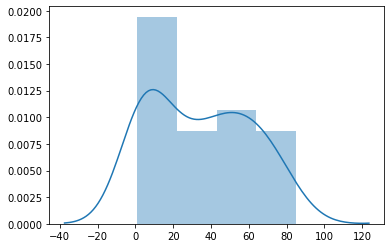

In [47]:
import seaborn as sb
a = []
b = []
for i in range(len(T)):
    if T[i][7] == 0:
        a.append(T[i][0])
    if T[i][7] == 1:
        a.append(T[i][0])
sb.distplot(a)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


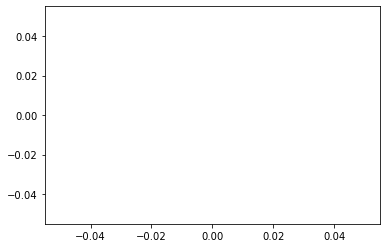

In [48]:
sb.distplot(b)

In [49]:
count_bad

7141